# Bias Mitigation using Reweighing Algorithm

This example notebook demonstrates usage of `Reweighing` algorithm for bias mitigation from AIF-360 library [https://aif360.readthedocs.io/en/v0.2.3/modules/preprocessing.html#reweighing]

In [1]:
import sys

# adding root directory of project to python path to allow relative imports
sys.path.append("..")

In [2]:
# import relevant dependencies
import pandas as pd
from sklearn.datasets import fetch_openml
from src.bias_and_fairness_mitigation import BiasAndFairnessMitigation
from sklearn.model_selection import train_test_split

`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df

In [3]:
# fetch raw-data from sklearn.datasets
raw_data = fetch_openml(data_id=1590, as_frame=True)

# preview raw-data
raw_data.frame

c:\Users\I2044\Anaconda3\envs\python38\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18.0,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
48838,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
48839,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
48840,22.0,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


In [4]:
# X_raw = raw_data.data
# y_raw = raw_data.target
X_train, X_test, y_train, y_test = train_test_split(raw_data.data, raw_data.target, test_size=0.33, random_state=42)

## A. Dev
### A1. Checking for bias in a given sample (training) data
Sample (training) data is the data on which the ML model may be trained. The ground truth (y-variable) for this data is known.<br>
In this example, we will check for `gender bias` and `racial bias` in a given sample (training) data.

In [5]:
# define parameters for setting bias-fairness framework
positive_outcome=">50K"
mitigation_strategy="reweighing"

# setup bias-fairness check
obj = BiasAndFairnessMitigation(
    X=X_train,
    y=y_train,
    positive_outcome=">50K",
    mitigation_strategy="reweighing"
)

In [ ]:
BIAS_MITIGATION_MODEL = obj.train_bias_mitigation_model(mitigation_strategy='reweighing')
BIAS_MITIGATION_MODEL

In [9]:
# define the sensitive features & their privilege groups against which you need to check the model fairness
sensitive_features = {
    "sex": "Male",
    "race": "White"
}

# run bias-fairness checks on sample data for given sensitive features
bias_scores = obj.describe_bias_and_fairness(sensitive_features=sensitive_features)

c:\Users\I2044\Desktop\Projects\ml-platform\bias-fairness-framework\bias_fairness_checker\notebooks\..\src\bias_and_fairness_mitigation.py:352: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(["", ""])
c:\Users\I2044\Desktop\Projects\ml-platform\bias-fairness-framework\bias_fairness_checker\notebooks\..\src\bias_and_fairness_mitigation.py:353: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels=[0, "", 0.5, "", 1, "", 1.5, "", 2])
c:\Users\I2044\Desktop\Projects\ml-platform\bias-fairness-framework\bias_fairness_checker\notebooks\..\src\bias_and_fairness_mitigation.py:354: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(["", ""])
c:\Users\I2044\Desktop\Projects\ml-platform\bias-fairness-framework\bias_fairness_checker\notebooks\..\src\bias_and_fairness_mitigation.py:355: UserWarning: FixedFormatter should only be used together with FixedLo

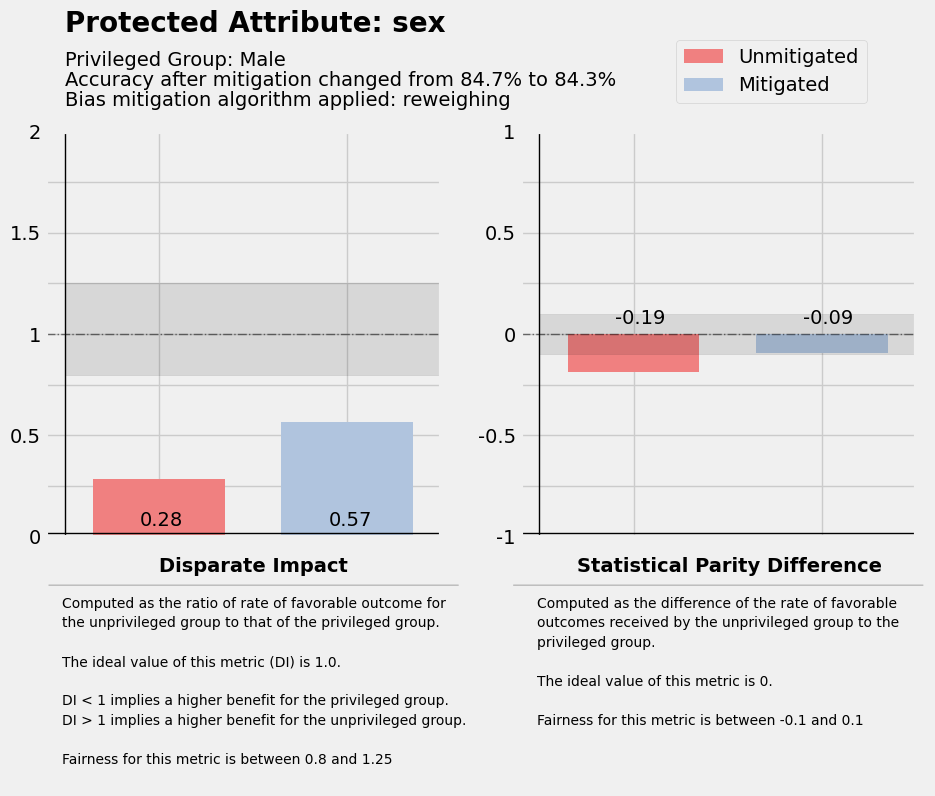

In [7]:
# check for gender bias
obj.plot_bias_scores('sex')

c:\Users\I2044\Desktop\Projects\ml-platform\bias-fairness-framework\bias_fairness_checker\notebooks\..\src\bias_and_fairness_mitigation.py:352: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(["", ""])
c:\Users\I2044\Desktop\Projects\ml-platform\bias-fairness-framework\bias_fairness_checker\notebooks\..\src\bias_and_fairness_mitigation.py:353: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels=[0, "", 0.5, "", 1, "", 1.5, "", 2])
c:\Users\I2044\Desktop\Projects\ml-platform\bias-fairness-framework\bias_fairness_checker\notebooks\..\src\bias_and_fairness_mitigation.py:354: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(["", ""])
c:\Users\I2044\Desktop\Projects\ml-platform\bias-fairness-framework\bias_fairness_checker\notebooks\..\src\bias_and_fairness_mitigation.py:355: UserWarning: FixedFormatter should only be used together with FixedLo

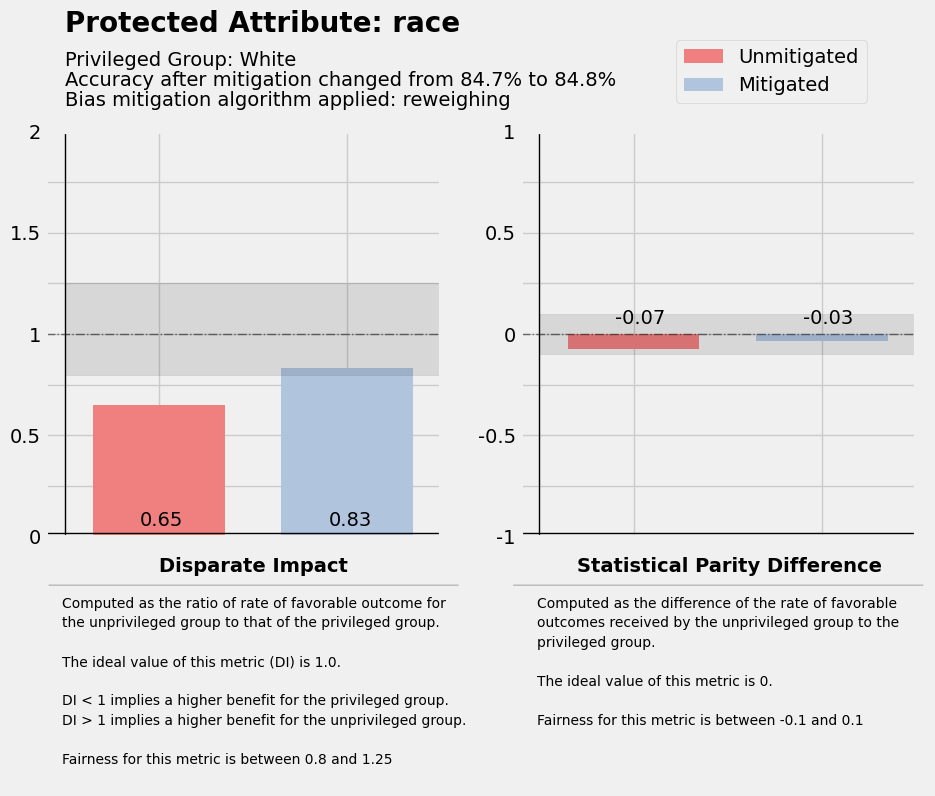

In [10]:
# check for racial bias
obj.plot_bias_scores('race')

#### Conclusion
1. Gender bias and racial bias exists in our model / data
2. Applying `reweighing` algorithm will make the model unbiased against only racial prejudice, and not gender prejudice
3. It is recommended to apply bias mitigation using `reweighing` algorithm against the `race` feature

### A2. Mitigating bias in the test data
Now that we know that we need to apply bias-mitigation for the racial bias due to `race` attribute, we perform bias mitigation on test sample data

In [ ]:
obj = BiasAndFairnessMitigation(
    X=X_train,
    y=y_train,
    positive_outcome=">50K",
    mitigation_strategy="reweighing"
)

In [ ]:
# create bias-mitigation model
BIAS_MITIGATION_MODEL = obj.train_bias_mitigation_model()
BIAS_MITIGATION_MODEL.transfor

## Prod

In [ ]:
positive_outcome = ">50K"
mitigation_strategy = "reweighing"

sensitive_features = {
    "race": "White",
    "sex": "Male",
    "native-country": "United-States",
    "relationship": "Husband"
}

In [159]:
new_sensitive_features = {
    'sex_Male': 1,
    'race_White': 1,
    'age': lambda x: x > 25
}

In [126]:
# import relevant dependencies
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

from aif360.datasets import StandardDataset
from aif360.algorithms.preprocessing import Reweighing
from aif360.algorithms.postprocessing.reject_option_classification import RejectOptionClassification
from aif360.algorithms.postprocessing.calibrated_eq_odds_postprocessing import CalibratedEqOddsPostprocessing

class ReweighingModel:
    def __init__(self, protected_attribute_name: str):
        self.protected_attribute_name = protected_attribute_name

    def create_dataset(
        self, X: pd.DataFrame, y
    ) -> StandardDataset:
        if isinstance(y, np.ndarray):
            y = pd.Series(y.flatten(), index=X.index, name='class')
        return StandardDataset(
            df=pd.concat([X, y], axis=1),
            label_name="class",
            favorable_classes=[1],
            protected_attribute_names=[self.protected_attribute_name],
            privileged_classes=[[1]],
        )
    
    def fit_model(self, X, y):
        dataset = self.create_dataset(X, y)

        privileged_groups = [{self.protected_attribute_name: 1.0}]
        unprivileged_groups = [{self.protected_attribute_name: 0.0}]

        self.mitigation_model = Reweighing(
            privileged_groups=privileged_groups,
            unprivileged_groups=unprivileged_groups,
        )
        self.mitigation_model.fit(dataset)

    def get_outputs(self, mitigator, X, y_true):
        dataset = self.create_dataset(X, y_true)
        dataset_transf = mitigator.transform(dataset)
        sample_weights = dataset_transf.instance_weights
        return sample_weights

class ROCModel:
    def __init__(self, protected_attribute_name: str):
        self.protected_attribute_name = protected_attribute_name

    def create_dataset(
        self, X: pd.DataFrame, y) -> StandardDataset:
        if isinstance(y, np.ndarray):
            y = pd.Series(y.flatten(), index=X.index, name='class')
        return StandardDataset(
            df=pd.concat([X, y], axis=1),
            label_name="class",
            favorable_classes=[1],
            protected_attribute_names=[self.protected_attribute_name],
            privileged_classes=[[1]],
        )
    
    def fit_model(self, X_true, y_true, y_pred_proba):

        dataset = self.create_dataset(X_true, y_true)
        dataset_pred = dataset.copy()
        dataset_pred.scores = y_pred_proba
        dataset_pred.labels = 1 * (y_pred_proba > 0.5)

        privileged_groups = [{self.protected_attribute_name: 1.0}]
        unprivileged_groups = [{self.protected_attribute_name: 0.0}]

        self.mitigation_model = RejectOptionClassification(
            unprivileged_groups=unprivileged_groups,
            privileged_groups=privileged_groups,
            low_class_thresh=0.01,
            high_class_thresh=0.99,
            num_class_thresh=100,
            num_ROC_margin=50,
            metric_name="Statistical parity difference",
            metric_ub=0.05,
            metric_lb=-0.05,
        )
    
        self.mitigation_model.fit(dataset, dataset_pred)

    def get_outputs(self, mitigator, X, y_pred_proba):
        y_pred = 1 * (y_pred_proba > 0.5)
        dataset = self.create_dataset(X, y_pred)
        dataset.scores = y_pred_proba
        y_pred_mit = mitigator.predict(dataset).labels
        return y_pred_mit

class CEOModel:
    def __init__(self, protected_attribute_name: str):
        self.protected_attribute_name = protected_attribute_name
    
    def create_dataset(
        self, X: pd.DataFrame, y
    ) -> StandardDataset:
        if isinstance(y, np.ndarray):
            y = pd.Series(y.flatten(), index=X.index, name='class')
        return StandardDataset(
            df=pd.concat([X, y], axis=1),
            label_name="class",
            favorable_classes=[1],
            protected_attribute_names=[self.protected_attribute_name],
            privileged_classes=[[1]],
        )
    
    def fit_model(self, X_true, y_true, y_pred_proba):
        
        dataset = self.create_dataset(X_true, y_true)
        dataset_pred = dataset.copy()
        dataset_pred.labels =  1 * (y_pred_proba > 0.5)
        dataset_pred.scores = y_pred_proba
        
        privileged_groups = [{self.protected_attribute_name: 1.0}]
        unprivileged_groups = [{self.protected_attribute_name: 0.0}]
        
        self.mitigation_model = CalibratedEqOddsPostprocessing(
            unprivileged_groups=unprivileged_groups,
            privileged_groups=privileged_groups,
            cost_constraint = "fnr",
            seed=42
        )
        self.mitigation_model.fit(dataset, dataset_pred)

    def get_outputs(self, mitigator, X, y_pred_proba):
        y_pred = 1 * (y_pred_proba > 0.5)
        dataset = self.create_dataset(X, y_pred)
        dataset.scores = y_pred_proba
        y_pred_mit = mitigator.predict(dataset).labels
        return y_pred_mit

class BiasFairnessMitigation:
    def __init__(
        self, protected_attribute_name, mitigation_algorithm: str = "reweighing"
    ):
        self.protected_attribute_name = protected_attribute_name
        self.mitigation_algorithm = mitigation_algorithm

    def fit_model(self, X_true, y_true, y_pred_proba=None):
        """
        This will return a model object from aif360.preprocessing/postprocessing modules.
        this model

        """
        if self.mitigation_algorithm == "reweighing":
            self.model = ReweighingModel(self.protected_attribute_name)
            self.model.fit_model(X_true, y_true)
        
        if self.mitigation_algorithm == "roc":
            # here X is X-val and y is y-val
            self.model = ROCModel(self.protected_attribute_name)
            self.model.fit_model(X_true, y_true, y_pred_proba)

        if self.mitigation_algorithm == "ceo":
            self.model = CEOModel(self.protected_attribute_name)
            self.model.fit_model(X_true, y_true, y_pred_proba)

        mitigator = self.model.mitigation_model
        return mitigator

    def get_outputs(self, mitigator, X, y_true=None, y_pred_proba=None):
        if self.mitigation_algorithm == "reweighing":
            sample_weights = self.model.get_outputs(mitigator, X, y_true)
            return sample_weights

        if self.mitigation_algorithm == "roc":
            # here X is X-test and y_pred is y-pred
            y_pred_new = self.model.get_outputs(mitigator, X, y_pred_proba)
            return y_pred_new
        
        if self.mitigation_algorithm == "ceo":
            y_pred_new = self.model.get_outputs(mitigator, X, y_pred_proba)
            return y_pred_new

In [47]:
# fetch raw-data from sklearn.datasets
raw_data = fetch_openml(data_id=1590, as_frame=True)

c:\Users\I2044\Anaconda3\envs\python38\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [17]:
from sklearn.preprocessing import MinMaxScaler

X_raw = pd.get_dummies(raw_data.data)
X_raw = pd.DataFrame(MinMaxScaler().fit_transform(X_raw), columns=X_raw.columns)
y = 1 * (raw_data.target == ">50K")

X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.5, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [48]:
obj_roc = BiasFairnessMitigation("sex_Male",mitigation_algorithm='roc')

In [49]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(solver="liblinear", random_state=42)
LR.fit(X_train, y_train)
y_val_pred = LR.predict(X_val).reshape(-1,1)
y_val_pred_proba = LR.predict_proba(X_val)[:,1].reshape(-1,1)

y_test_pred = LR.predict(X_test).reshape(-1,1)
y_test_pred_proba = LR.predict_proba(X_test)[:,1].reshape(-1,1)

In [50]:
mitigator = obj_roc.fit_model(X_val, y_val, y_val_pred_proba)

In [51]:
y_test_pred_mit = obj_roc.get_outputs(mitigator, X_test, y_test_pred_proba)

In [53]:
y_test_pred.mean()

0.1918099918099918

In [52]:
y_test_pred_mit.mean()

0.3525798525798526

In [184]:
protected_attribute_name = 'sex_Male'

obj_rew = BiasFairnessMitigation(protected_attribute_name, mitigation_algorithm='reweighing')

In [185]:
mitigator = obj_rew.fit_model(X_train, y_train)

In [186]:
sample_weights = obj_rew.get_outputs(mitigator, X=X_train, y_true=y_train)

In [187]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(solver="liblinear", random_state=42)
LR.fit(X_train, y_train)
y_val_pred_unmit = LR.predict(X_val).reshape(-1,1)

LR.fit(X_train, y_train, sample_weight=sample_weights)
y_val_pred_mit = LR.predict(X_val).reshape(-1,1)

In [188]:
from aif360.metrics import ClassificationMetric

def create_dataset(
    X: pd.DataFrame, y, protected_attribute_name: str
) -> StandardDataset:
    if isinstance(y, np.ndarray):
        y = pd.Series(y.flatten(), index=X.index, name='class')
    return StandardDataset(
        df=pd.concat([X, y], axis=1),
        label_name="class",
        favorable_classes=[1],
        protected_attribute_names=[protected_attribute_name],
        privileged_classes=[[1]],
    )

privileged_groups = [{protected_attribute_name: 1.0}]
unprivileged_groups = [{protected_attribute_name: 0.0}]

dataset_val = create_dataset(X_val, y_val, protected_attribute_name)
dataset_val_pred_unmit = create_dataset(X_val, y_val_pred_unmit, protected_attribute_name)
dataset_val_pred_mit = create_dataset(X_val, y_val_pred_mit, protected_attribute_name)

metric_unmit = ClassificationMetric(
    dataset_val,
    dataset_val_pred_unmit,
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups
)

metric_mit = ClassificationMetric(
    dataset_val,
    dataset_val_pred_mit,
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups
)

In [189]:
metric_unmit.disparate_impact()

0.2527945391649485

In [190]:
metric_mit.disparate_impact()

0.5848093760678539

In [191]:
metric_unmit.binary_confusion_matrix(privileged=True)

{'TP': 1502.0, 'FP': 567.0, 'TN': 5184.0, 'FN': 977.0}

In [192]:
metric_unmit.binary_confusion_matrix(privileged=False)

{'TP': 192.0, 'FP': 61.0, 'TN': 3505.0, 'FN': 223.0}

In [193]:
metric_mit.binary_confusion_matrix(privileged=True)

{'TP': 1283.0, 'FP': 382.0, 'TN': 5369.0, 'FN': 1196.0}

In [194]:
metric_mit.binary_confusion_matrix(privileged=False)

{'TP': 280.0, 'FP': 191.0, 'TN': 3375.0, 'FN': 135.0}

In [195]:
metric_unmit.accuracy()

0.8502989108181148

In [196]:
metric_mit.accuracy()

0.8440750143313406

In [198]:
metric_unmit.disparate_impact()

0.2527945391649485

In [150]:
obj_rew = BiasFairnessMitigation("sex_Male",mitigation_algorithm='roc')


In [151]:
mitigator = obj_rew.fit_model(X_val, y_val, y_val_pred_proba)

In [152]:
y_test_pred_transf = obj_rew.get_outputs(mitigator, X=X_test, y_pred_proba=y_test_pred_proba)

In [153]:
(y_test_pred == y_test_pred_transf).sum()

10247

In [154]:
from aif360.metrics import ClassificationMetric

def create_dataset(
    X: pd.DataFrame, y, protected_attribute_name: str
) -> StandardDataset:
    if isinstance(y, np.ndarray):
        y = pd.Series(y.flatten(), index=X.index, name='class')
    return StandardDataset(
        df=pd.concat([X, y], axis=1),
        label_name="class",
        favorable_classes=[1],
        protected_attribute_names=[protected_attribute_name],
        privileged_classes=[[1]],
    )

protected_attribute_name = 'sex_Male'
privileged_groups = [{protected_attribute_name: 1.0}]
unprivileged_groups = [{protected_attribute_name: 0.0}]

dataset_test = create_dataset(X_test, y_test, protected_attribute_name)
dataset_test_pred_unmit = create_dataset(X_test, y_test_pred, protected_attribute_name)
dataset_test_pred_mit = create_dataset(X_test, y_test_pred_transf, protected_attribute_name)

metric_unmit = ClassificationMetric(
    dataset_test,
    dataset_test_pred_unmit,
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups
)

metric_mit = ClassificationMetric(
    dataset_test,
    dataset_test_pred_mit,
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups
)

In [155]:
print(f"prediction bias in unmitigated model: {metric_unmit.disparate_impact()}")
print(f"prediction bias in bias mitigated model: {metric_mit.disparate_impact()}")

prediction bias in unmitigated model: 0.28442441174103594
prediction bias in bias mitigated model: 0.8976395509918311


In [156]:
metric_unmit.binary_confusion_matrix(privileged=True)

{'TP': 1493.0, 'FP': 562.0, 'TN': 5185.0, 'FN': 949.0}

In [157]:
metric_unmit.binary_confusion_matrix(privileged=False)

{'TP': 221.0, 'FP': 66.0, 'TN': 3501.0, 'FN': 233.0}

In [158]:
metric_mit.binary_confusion_matrix(privileged=True)

{'TP': 1887.0, 'FP': 1101.0, 'TN': 4646.0, 'FN': 555.0}

In [159]:
metric_mit.binary_confusion_matrix(privileged=False)

{'TP': 421.0, 'FP': 896.0, 'TN': 2671.0, 'FN': 33.0}

In [160]:
metric_unmit.binary_confusion_matrix()

{'TP': 1714.0, 'FP': 628.0, 'TN': 8686.0, 'FN': 1182.0}

In [161]:
metric_mit.binary_confusion_matrix()

{'TP': 2308.0, 'FP': 1997.0, 'TN': 7317.0, 'FN': 588.0}